In [4]:
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import collections
from bs4 import BeautifulSoup
import csv
import string
import json
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from heapq import heappush, heappop

In [2]:
import utils

In [20]:
#load pre-calculated data for search engune 1
with open('vocabulary.txt', 'r')as f1:
    vocabulary = f1.read()
    vocab_list = vocabulary.split()
with open('All_text_title_intro_plot.txt', 'r') as file:
    all_text = file.read()
with open('words_per_doc.txt', 'r') as f2:
    words_per_doc = json.loads(f2.read())
with open('Inverted_index1.txt', 'r') as f2:
    inverted_index = json.loads(f2.read())
with open('vocab_dic.txt', 'r') as f3:
    vocab_dic = json.loads(f3.read())
with open('Inverted_index2.txt', 'r') as f4:
    inverted_index2 = json.loads(f4.read())
with open('Inverted_index3.txt', 'r') as f5:
    inverted_index3 = json.loads(f5.read())
with open('Inverted_index4.txt', 'r') as f6:
    inverted_index4 = json.loads(f6.read())
with open('features_text_dict.txt', 'r') as f:
    features_text_dict = json.loads(f.read())

In [6]:
def get_movies1(result):
    if len(result)!=0:
        result_df = pd.DataFrame(columns=['Id', 'Title', 'Intro', 'Url'])
        urls= pd.read_csv("/Users/MO/Desktop/ADM/ADM-HW3/Movies_urls.tsv",sep='\t')
        df_idx=0
        for i in result:
            movie =pd.read_csv("/Users/MO/Desktop/ADM/ADM-HW3/Movies_tsv_files/Doc"+str(i)+".tsv",sep='\t')
            id_= movie['Id'][0]
            title=movie['Title'][0]
            intro=movie['Intro'][0]
            url=urls.Url[i-1]
            result_df.loc[df_idx]=[id_,title,intro,url]
            df_idx+=1
        return result_df
    else: print('No result1...')

# Search Engine 1

In [17]:
def engine1():
    query = input()
    query= utils.clean_text(query) #clean query
    docs=[]
    for w in query.split():
        try:
            docs.append(inverted_index[str(vocab_dic.get(w))]) #getting ALL docs containing query words
        except:
            continue
    try:
        result=set(docs[0]).intersection(*docs)
        return get_movies1(result)
    except:
        return 'No result...'

In [19]:
engine1()

disney 2019


,Id,Title,Intro,Url
0,15329,The Chronicles of Narnia: Prince Caspian,The Chronicles of Narnia: Prince Caspian premi...,https://en.wikipedia.org/wiki/The_Chronicles_o...
1,12515,Toy Story,In addition to home media and theatrical re-re...,https://en.wikipedia.org/wiki/Toy_Story
2,15652,The Princess and the Frog,The Princess and the Frog opened in limited re...,https://en.wikipedia.org/wiki/The_Princess_and...
3,15560,G-Forcei (film),G-Force was released in the United States on J...,https://en.wikipedia.org/wiki/G-Force_(film)
4,11177,The Little Mermaidi (1989 film),"In May 2016, Disney announced that a live-acti...",https://en.wikipedia.org/wiki/The_Little_Merma...
5,16713,Maleficenti (film),"A sequel, Maleficent: Mistress of Evil, was re...",https://en.wikipedia.org/wiki/Maleficent_(film)
6,12267,Thumbelinai (1994 film),The film was produced by Don Bluth Ireland Ltd...,https://en.wikipedia.org/wiki/Thumbelina_(1994...
7,12172,The Lion King,"In 2016, the film was selected for preservatio...",https://en.wikipedia.org/wiki/The_Lion_King
8,14988,Shark Bait,"A direct-to-DVD sequel, The Reef 2: High Tide ...",https://en.wikipedia.org/wiki/Shark_Bait
9,15723,The Chronicles of Narnia: The Voyage of the Da...,"The film premiered on November 30, 2010, at a ...",https://en.wikipedia.org/wiki/The_Chronicles_o...


In [9]:
def tf_idf_query(query):
    #INPUT: query
    #OUTPUT: tf-idf of the query terms
    query_list=query.split()
    tf_idf={}
    for w in set(query_list):
        #print(term_id)
        try:
            term_id=vocab_dic[w]
            tf= query_list.count(w)/len(query_list)
            idf= math.log( 30000/len(inverted_index2[str(term_id)]))
            tf_idf[term_id]= tf*idf
        except:
            
            continue
    
    return tf_idf

In [10]:
def get_movies2(result,cos_sim):
    if len(result)!=0:
        result_df = pd.DataFrame(columns=['Title', 'Intro', 'Url','Cos_sim'])
        urls= pd.read_csv("/Users/MO/Desktop/ADM/ADM-HW3/Movies_urls.tsv",sep='\t')
        df_idx=0
        for i,j in zip(result,cos_sim):
            movie =pd.read_csv("/Users/MO/Desktop/ADM/ADM-HW3/Movies_tsv_files/Doc"+str(i)+".tsv",sep='\t')
            title=movie['Title'][0]
            intro=movie['Intro'][0]
            url=urls.Url[i-1]
            result_df.loc[df_idx]=[title,intro,url,str(j)]
            df_idx+=1
        return result_df
    else: print('No result...')

# Search Engine 2

In [14]:
#Search engine 2
def engine2():
    query= input()
    query= utils.clean_text(query) #clean query
    query_tfidf= tf_idf_query(query)
    docs=[]
    for w in query.split():
        try:
            docs.append(inverted_index[str(vocab_dic.get(w))]) #getting ALL docs containing query words
        except:
            continue
    try:        
        result=set(docs[0]).intersection(*docs)
        docs_tfidf=dict( zip(result,[[] for i in range(len(result))]))
        for term_id in query_tfidf:
            for doc in inverted_index4[str(term_id)]:
                if doc[0] in result: docs_tfidf[doc[0]].append(doc[1])

        vec1= np.array([list(query_tfidf.values())])
        vec2= np.array(list(docs_tfidf.values()))
        result2= cosine_similarity(vec1, vec2)
        result_df = pd.DataFrame([result,result2[0]],index=['doc_id', 'cos_sim'])
        result_df=result_df.sort_values(by ='cos_sim', axis=1,ascending=False)
        top_ten_result=list(map(int,result_df.loc['doc_id'][:10]))
        top_ten_cos_sim= list(result_df.loc['cos_sim'][:10])
        return get_movies2(top_ten_result, top_ten_cos_sim)
    except:
        return 'No result...'




In [16]:
engine2()

disney


,Title,Intro,Url,Cos_sim
0,Splashi (film),The film is notable for being the first film r...,https://en.wikipedia.org/wiki/Splash_(film),1.0
1,In Search of the Castawaysi (film),In Search of the Castaways is a 1962 Walt Disn...,https://en.wikipedia.org/wiki/In_Search_of_the...,1.0
2,Roadside Romeo,"Throughout the film, the characters speak in b...",https://en.wikipedia.org/wiki/Roadside_Romeo,1.0
3,Lakshyami (2017 film),Lakshyam(English :Target) is a 2017 Indian Mal...,https://en.wikipedia.org/wiki/Lakshyam_(2017_f...,1.0
4,Prince of Persia: The Sands of Timei (film),The film received generally mixed reviews from...,https://en.wikipedia.org/wiki/Prince_of_Persia...,1.0
5,Der Fuehrer's Face,Der Fuehrer's Face won the Oscar for Best Anim...,https://en.wikipedia.org/wiki/Der_Fuehrer%27s_...,1.0
6,Education for Death,Education for Death: The Making of the Nazi is...,https://en.wikipedia.org/wiki/Education_for_Death,1.0
7,Herbie Goes Bananas,Herbie Goes Bananas is a 1980 American comedy ...,https://en.wikipedia.org/wiki/Herbie_Goes_Bananas,1.0
8,Aladdini (1992 Disney film),"Aladdin was released on November 25, 1992, to ...",https://en.wikipedia.org/wiki/Aladdin_(1992_Di...,1.0
9,Moon Pilot,The film is based on Robert Buckner's 1960 nov...,https://en.wikipedia.org/wiki/Moon_Pilot,1.0


In [21]:
def get_tf_idf_query_similarity(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities

In [22]:
def heap(sims,doc_ids):
    data=[]
    heap = []
    for i in range(len(result)):
        data.append((-sims[i],doc_ids[i]))
    for item in data:
         heappush(heap, item)
    output=[]
    while heap:
         output.append(-heappop(heap)[0])
    return output

# Search Engine 3

In [53]:
#Search Engine 3
def engine3():
    query = input() #first search query, get engine1 result
    query2= input()
    query2= utils.clean_text(query2)
    query= utils.clean_text(query) #clean query
    docs=[]
    for w in query.split():
        try:
            docs.append(inverted_index2[str(vocab_dic.get(w))]) #getting ALL docs containing query words
        except:
            continue
    try:
        result=set(docs[0]).intersection(*docs)

        result_features= [utils.clean_text(features_text_dict[str(i)]) for i in result]
        vectorizer = TfidfVectorizer()
        docs_tfidf = vectorizer.fit_transform(result_features)
        result_sim = get_tf_idf_query_similarity(vectorizer, docs_tfidf, query2)
        movies = get_movies1(result)
        sorted_sims = heap(result_sim,list(result))
        movies.insert(4, "Similarity", sorted_sims)
        return movies.head(10)

    except:
        return 'No result...6'

In [57]:
result3 = engine3()

disney
English United states Walt Disney


In [58]:
result3

,Id,Title,Intro,Url,Similarity
0,10241,Splashi (film),The film is notable for being the first film r...,https://en.wikipedia.org/wiki/Splash_(film),0.361267
1,8203,The Jungle Booki (1967 film),"The Jungle Book was released on October 18, 19...",https://en.wikipedia.org/wiki/Jungle_Book_(196...,0.354979
2,12305,Baltoi (film),Balto is a 1995 American-British live-action/a...,https://en.wikipedia.org/wiki/Balto_(film),0.315163
3,16405,Despicable Me 2,"Despicable Me 2 premiered on June 5, 2013 in A...",https://en.wikipedia.org/wiki/Despicable_Me_2,0.276605
4,10262,Where the Toys Come From,Where The Toys Come From is a Disney special d...,https://en.wikipedia.org/wiki/Where_the_Toys_C...,0.237419
5,14359,Confessions of a Teenage Drama Queen,It was released in late February 2004 to negat...,https://en.wikipedia.org/wiki/Confessions_of_a...,0.237013
6,12312,The Big Green,The Big Green is an American 1995 family sport...,https://en.wikipedia.org/wiki/The_Big_Green,0.236011
7,10275,Baby: Secret of the Lost Legend,Produced by Walt Disney Studios and released o...,https://en.wikipedia.org/wiki/Baby:_Secret_of_...,0.229074
8,12323,Bushwhackedi (film),The film was originally conceived as a spin of...,https://en.wikipedia.org/wiki/Bushwhacked_(film),0.228464
9,16425,The Fifth Estatei (film),Co-produced by DreamWorks Pictures and Partici...,https://en.wikipedia.org/wiki/The_Fifth_Estate...,0.225151


In [56]:
def create_Graph(movies):
    

    final_ac_list = []
    act_dict={}
    films_ = movies.head(10)
    need_info=pd.merge(films_,all_data,how='inner')

    for i in range(len(need_info)):
        for a in need_info['Starring'][i].split('-'):
            final_ac_list.append(a)

    for i in final_ac_list:
           act_dict[i]=[]

    for i in range(len(need_info)):
        for a in need_info['Starring'][i].split('-'):
                act_dict[a].append(need_info['Title'][i])

    G=nx.Graph()
    G.add_nodes_from(act_dict.keys())  


    for i in act_dict:
           for j in act_dict: 
                if i!= j:
                     if (len(set(act_dict[i]).intersection(set(act_dict[j]))))>=2 :
                            G.add_edge(i,j)

    nx.draw_circular(G,with_labels=True,node_size=90,alpha=0.7)

In [60]:
all_data=pd.read_csv('movies_features.csv', sep='\t')
del all_data['Unnamed: 0']

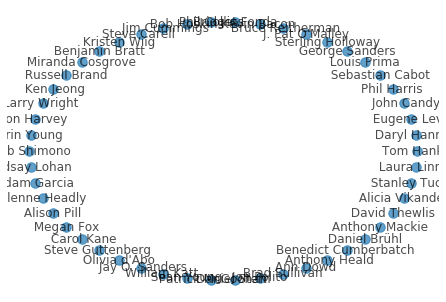

In [61]:
create_Graph(result3)